# TP Final - Tópicos de Minería de Datos
### Juan Ignacio Farizano

--------------------------------------------------------------------------------

In [ ]:
source("common.R")
library(janitor)

In [32]:
# leo el dataset
csgo <- read.csv("csgo_round_snapshots.csv")

# maps.names <- unique(csgo[,4])
# for (i in 1:length(maps.names)) {
#   csgo[,4][csgo[,4] == maps.names[i]] <- i
# }
csgo <- csgo[,-4]

csgo[,4][csgo[,4] == "FALSE"] <- 0
csgo[,4][csgo[,4] == "TRUE"] <- 1

# las columnas que son strings las convierto a factores
csgo[c(4,96)] <- lapply(csgo[c(4,96)], factor)
# escalo las variables numéricas
csgo[] <- lapply(csgo, function(x) if(is.numeric(x)){scale(x)} else x)

# separo en x e y
y.csgo <- csgo[,96]
x.csgo <- csgo[,-96]

x.csgo[,4] <- as.double(x.csgo[,4])
# elimino las columnas que son constantes
x.csgo <- remove_constant(x.csgo, na.rm= TRUE)

In [35]:
cat("\n-- Ranking de variables --\n")
cat("\n-- Forward ranking random forest --\n")
FORW.rf <- forward.ranking(x.csgo,y.csgo,method="rf.est" ,tot.trees=100,equalize.classes=F, verbosity=1)
cat("\n-- Forward ranking lda --\n")
FORW.lda <- forward.ranking(x.csgo,y.csgo,method="lda.est", verbosity=1)

cat("\n-- Backward ranking random forest --\n")
BACK.rf <- backward.ranking(x.csgo,y.csgo,method="rf.est" ,tot.trees=100,equalize.classes=F, verbosity=1)
cat("\n-- Backward ranking lda --\n")
BACK.lda <- backward.ranking(x.csgo,y.csgo,method="lda.est", verbosity=1)

cat("\n-- Kruskal-Wallis --\n")
KW <- kruskalwallis.ranking(x.csgo, y.csgo, verbosity = 1)

cat("\n-- RFE random forest --\n")
RFE.rf <- rfe.ranking(x.csgo,y.csgo,method="imp.rf", tot.trees=100, verbosity=1)
cat("\n-- RFE linear SVM --\n")
RFE.linsvm <- rfe.ranking(x.csgo,y.csgo,method="imp.linsvm", verbosity=1)


-- Ranking de variables --

-- Kruskal-Wallis --

---------
Final ranking  89  features.
Features:  ct_defuse_kits ct_helmets ct_armor t_helmets ct_grenade_flashbang t_armor ct_grenade_smokegrenade t_weapon_ak47 ct_weapon_awp ct_weapon_m4a4 ct_grenade_incendiarygrenade t_grenade_flashbang bomb_planted ct_grenade_hegrenade ct_players_alive t_weapon_sg553 ct_weapon_ak47 ct_weapon_sg553 t_grenade_smokegrenade t_weapon_awp t_weapon_usps ct_health t_grenade_molotovgrenade ct_weapon_usps t_grenade_hegrenade ct_money t_money t_weapon_mac10 t_weapon_m4a4 ct_weapon_aug t_players_alive ct_grenade_molotovgrenade time_left t_weapon_ump45 t_weapon_galilar ct_weapon_mp9 ct_score t_weapon_p250 ct_weapon_p250 t_grenade_incendiarygrenade ct_weapon_m4a1s ct_weapon_famas ct_weapon_tec9 t_weapon_fiveseven t_weapon_p2000 t_weapon_famas ct_weapon_ssg08 t_health ct_weapon_galilar t_weapon_mp5sd t_score t_weapon_m4a1s t_weapon_aug t_weapon_glock ct_weapon_p2000 ct_weapon_ump45 t_grenade_decoygrenade ct_weapo

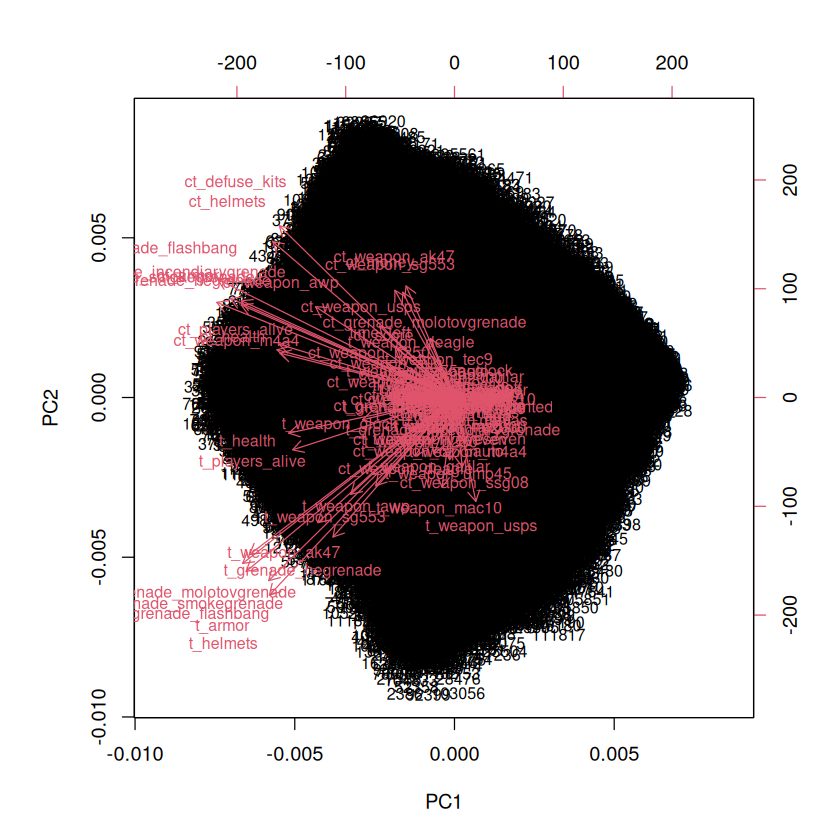

In [34]:
x.csgo.pca <- prcomp(x.csgo)
biplot(x.csgo.pca,cex=0.8)